<a href="https://colab.research.google.com/github/JP2821/Projeto_Titanic/blob/main/Mini_Projeto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MINI-PROJETO: ÁRVORES DE DECISÃO**

### Equipe 
*   João Pedro Ribeiro da Silva Dias - jprsd
*   Rodrigo Abreu Alves de Freitas Mota - raafm
*   Luana Campos Amado - lca3
*   Mateus Santana Gomes Nascimento - msgn2


# **Introdução**
Árvores de decisão são métodos de aprendizado de máquinas supervisionado não-paramétricos, muito utilizados em tarefas de classificação e regressão. Neste mini projeto, iremos utilizar este método para realizar a classificação de uma base de dados.

A base de dados utilizada contém informações, como: idade, nome, quantidade de parentes, de pessoas que estariam no naufrágio do Titanic. Dessa forma, o objetivo dessa atividade é determinar que passageiros sobreviveram, ou não, utilizando o método de árvore de decisão. 



# **Conectando ao google drive**

In [ ]:
from google.colab import drive                                                                                                                                                                                               #1
drive.mount('/content/drive')

Mounted at /content/drive


# **Bibliotecas Necessárias**

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from subprocess import call
from sklearn.tree import export_graphviz

# **Carregando os Datasets**

O dataset utilizado: https://www.kaggle.com/competitions/titanic

In [ ]:
df_treino = pd.read_csv('/content/drive/MyDrive/SistemasInteligentes/projeto_2/train.csv') #dataset para treino
df_teste = pd.read_csv('/content/drive/MyDrive/SistemasInteligentes/projeto_2/test.csv') # dataset que utilizaremos para testes
df_auxiliar = pd.read_csv('/content/drive/MyDrive/SistemasInteligentes/projeto_2/gender_submission.csv')

## **Unindo os datasets**

In [ ]:
df_teste['Survived'] = df_auxiliar['Survived']
cols = df_teste.columns.tolist()
cols = ['Survived'] + cols[0:-1]
df_teste = df_teste[cols]
df_treino = df_treino.append(df_teste)
df_treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


# Conteúdo das colunas

In [ ]:
for coluna in df_treino.columns.to_list():
    if coluna == "PassengerId":continue
    print(coluna)
    there_is_NaN = pd.isnull(df_treino[coluna]).any()
    print("there is NaN:",there_is_NaN)
    if there_is_NaN:
        N_nan = sum(pd.isnull(df_treino[coluna]).astype("int"))
        porcentagem = 100*N_nan/len(df_treino)
        print(f"\n{round(porcentagem,2)}% da coluna é de NaN")
    
    print("\nvalores possíveis: ")
    try:
        print(sorted(df_treino[coluna].unique()))
        print("\nrange: ",end = " ")
        print(f"[{df_treino[coluna].min()} , {df_treino[coluna].max()}]")
        print("media:",round(df_treino[coluna].mean(),5))
        print("desvio padrão:",round(df_treino[coluna].std(),5))
    except:
        print(df_treino[coluna].unique())

    
    print("_"*100)

Survived
there is NaN: False

valores possíveis: 
[0, 1]

range:  [0 , 1]
media: 0.37739
desvio padrão: 0.48492
____________________________________________________________________________________________________
Pclass
there is NaN: False

valores possíveis: 
[1, 2, 3]

range:  [1 , 3]
media: 2.29488
desvio padrão: 0.83784
____________________________________________________________________________________________________
Name
there is NaN: False

valores possíveis: 
['Abbing, Mr. Anthony', 'Abbott, Master. Eugene Joseph', 'Abbott, Mr. Rossmore Edward', 'Abbott, Mrs. Stanton (Rosa Hunt)', 'Abelseth, Miss. Karen Marie', 'Abelseth, Mr. Olaus Jorgensen', 'Abelson, Mr. Samuel', 'Abelson, Mrs. Samuel (Hannah Wizosky)', 'Abrahamsson, Mr. Abraham August Johannes', 'Abrahim, Mrs. Joseph (Sophie Halaut Easu)', 'Adahl, Mr. Mauritz Nils Martin', 'Adams, Mr. John', 'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)', 'Aks, Master. Philip Frank', 'Aks, Mrs. Sam (Leah Rosen)', 'Albimona, Mr. Nassef Ca

# Funções auxiliares

In [ ]:
def getResults(x_test, y_test, model):
  predicted = model.predict(x_test)
  print("Acurácia = ", accuracy_score(y_test, predicted),"\n\n\n")
  cm = confusion_matrix(y_test, predicted)
  sns.heatmap(cm, center=True)
  plt.show()
  print(pd.DataFrame(
    confusion_matrix(y_test, predicted),
    columns=['Predicted Not Survival', 'Predicted Survival'],
    index=['True Not Survival', 'True Survival']
  ))
  report = classification_report(y_test, predicted)
  print(report)

In [ ]:
def display_estatisticas_colunas(df,colunas_distribuicao):
    for col in colunas_distribuicao:
        sns.displot(df[col], kde = True)
        plt.show()

# Tratamento mínimo

Primeiro, iremos analisar os dados levando em consideração apenas as seguintes colunas 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived', pois esses apresentam alguma informação estatística.

In [ ]:
df_treino['Sex'] = (df_treino['Sex'] == 'female').astype("int")

In [ ]:
#excluindo linhas com valores ausentes
df1 = df_treino.copy()
df1 = df1.dropna()

# Experimento 1


## Removendo colunas sem tratamento

In [ ]:
df1.drop(columns = ["Name", "Ticket","Cabin","Embarked"],inplace = True)
print(df1.info()) # usei como teste pois caso execute a célula acima novamente
           # teremos um problema,pois a cópia será nula
df1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 1 to 414
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  270 non-null    int64  
 1   Survived     270 non-null    int64  
 2   Pclass       270 non-null    int64  
 3   Sex          270 non-null    int64  
 4   Age          270 non-null    float64
 5   SibSp        270 non-null    int64  
 6   Parch        270 non-null    int64  
 7   Fare         270 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 19.0 KB
None


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
1,2,1,1,1,38.0,1,0,71.2833
3,4,1,1,1,35.0,1,0,53.1000
6,7,0,1,0,54.0,0,0,51.8625
10,11,1,3,1,4.0,1,1,16.7000
11,12,1,1,1,58.0,0,0,26.5500
...,...,...,...,...,...,...,...,...
404,1296,0,1,0,43.0,1,0,27.7208
405,1297,0,2,0,20.0,0,0,13.8625
407,1299,0,1,0,50.0,1,1,211.5000
411,1303,1,1,1,37.0,1,0,90.0000


## separando train e test set

In [ ]:
x = df1.drop(['Survived'], axis = 1)
y = df1['Survived'] 

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 28,)

## treino e resultados


In [ ]:
tree = DecisionTreeClassifier(random_state = 28)
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=28)

In [ ]:
getResults(x_test,y_test,tree)

# Experimento 2
Tentaremos melhorar a nossa acurácia aplicando um tratamento sobre os dados

In [ ]:
df2 = df_treino.copy()
df2.info() #verificando se a cópia foi feita corretamente

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   int64  
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(6), object(4)
memory usage: 132.9+ KB


Note na célula acima que o padrão são 1045 linhas para cada coluna,entretando podemos notar que a coluna Age tem apenas 1046 dados, além dela a coluna Fare também tem 1 dado faltando. 

## **Distribuição de cada coluna de maneira gráfica**

### Com o gráfico boxplot

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


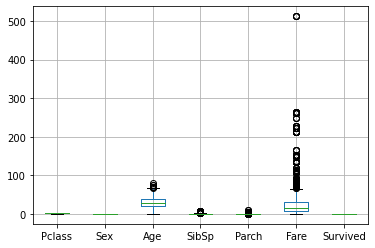

In [ ]:
colunas_distribuicao = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']
df2.boxplot(column = colunas_distribuicao)

### Com o gráfico de barras

nos gráficos a seguir poderemos ter uma melhor visão sobre o número de pessoas por cada coluna do dataset

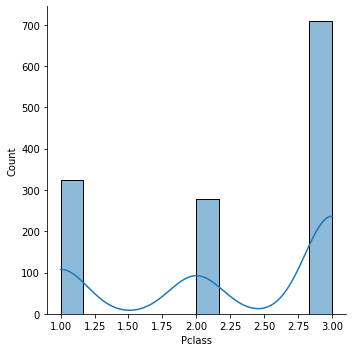

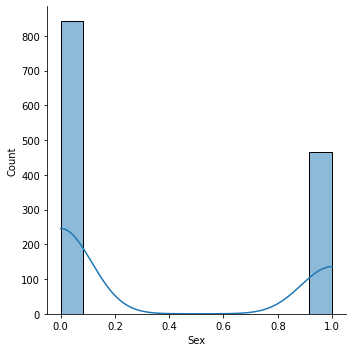

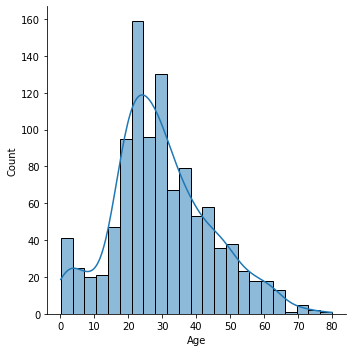

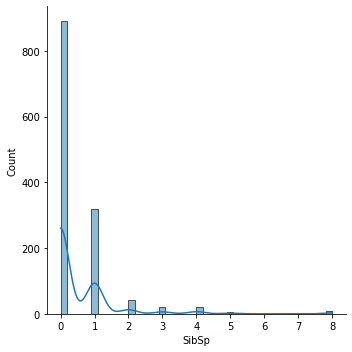

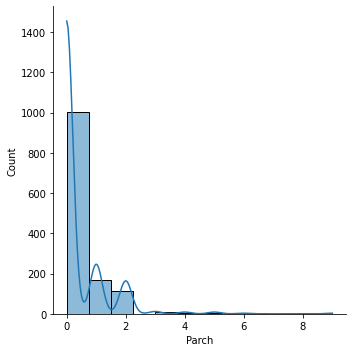

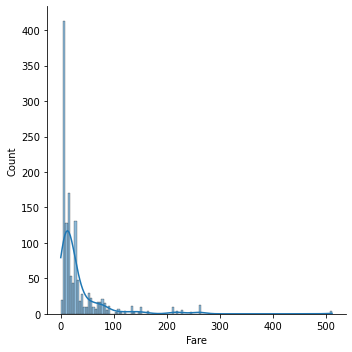

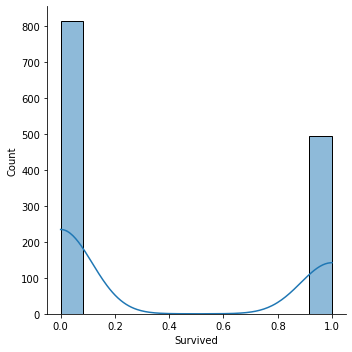

In [ ]:
display_estatisticas_colunas(df2,colunas_distribuicao)

Para que possamos usar as colunas em suas totalidade aquelas que tiverem valores ausentes, Age e Fare, terão esses valores ausentes,NaN,substituidos pela média dessas colunas

In [ ]:
#Para a idade

media = df2['Age'].mean()

df2['Age'] = df2['Age'].fillna(media)

#Para a tarifa
media_tarifa = df2['Fare'].mean()
df2['Fare'] = df2['Fare'].fillna(media_tarifa)
df2['Fare'].replace({0:media_tarifa}, inplace = True)

Seguindo o exemplo empregado em datasets anteriores a idade também pode ser associada como um fator que auxilia na sobrevivência do individuo,portanto dividr em grupos de faxetária pode melhor a acurácia da árvore

Sendo assim dividiremos os grupos assim:



*   Crianças( 0 a 17 anos) - 1
*   Jovens (18 a 36 anos) - 2
*   Adulto (37 a 55 anos) - 3
*   Idoso acima de 55 anos - 4



In [ ]:
df2.loc[df2['Age'] <= 18, 'Age'] = 1
df2.loc[(df2['Age'] > 18) & (df2['Age'] <= 36), 'Age'] = 2
df2.loc[(df2['Age'] > 36) & (df2['Age'] <= 55), 'Age'] = 3
df2.loc[(df2['Age'] > 55, 'Age')] = 4

In [ ]:
df2.drop(columns = ["Name", "Ticket","Cabin","Embarked"],inplace = True)
print(df2.info()) # usei como teste pois caso execute a célula acima novamente
           # teremos um problema,pois a cópia será nula
df2

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   int64  
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Fare         1309 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 92.0 KB
None


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,2.0,1,0,7.2500
1,2,1,1,1,3.0,1,0,71.2833
2,3,1,3,1,2.0,0,0,7.9250
3,4,1,1,1,2.0,1,0,53.1000
4,5,0,3,0,2.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
413,1305,0,3,0,2.0,0,0,8.0500
414,1306,1,1,1,3.0,0,0,108.9000
415,1307,0,3,0,3.0,0,0,7.2500
416,1308,0,3,0,2.0,0,0,8.0500


Acurácia =  0.8536585365853658 





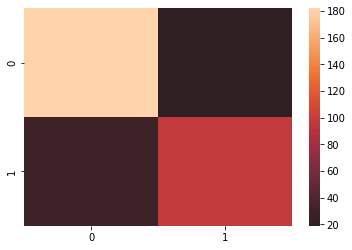

                   Predicted Not Survival  Predicted Survival
True Not Survival                     182                  19
True Survival                          29                  98
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       201
           1       0.84      0.77      0.80       127

    accuracy                           0.85       328
   macro avg       0.85      0.84      0.84       328
weighted avg       0.85      0.85      0.85       328



In [ ]:

x = df2.drop(['Survived'], axis = 1)
y = df2['Survived'] 

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 28,)
tree.fit(x_train, y_train)
getResults(x_test,y_test,tree)

# Experimento 3

In [ ]:
df3 = df_treino.copy()
colunas_distribuicao = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']

Percebemos que alguns poucos dados possuem Fare vários desvios padrões de distância da média, sendo possívelmente enviesado para nossa análise

In [ ]:
maior_Fare = df3["Fare"].max()
print(f"maximo: {maior_Fare}")
print("media:",round(df3["Fare"].mean(),5))
print("desvio padrão:",round(df3["Fare"].std(),5))

maximo: 512.3292
media: 33.29548
desvio padrão: 51.75867


In [ ]:
desvio = df3["Fare"].std()
media = df3["Fare"].mean()

In [ ]:
df3[df3["Fare"] > media + desvio*5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",1,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",0,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",0,35.0,0,0,PC 17755,512.3292,B101,C
343,1235,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C


In [ ]:
df3.drop(df3[df3["Fare"] > media + desvio*5].index,inplace = True)

In [ ]:
maior_Fare = df3["Fare"].max()
print(f"maximo: {maior_Fare}")
print("media:",round(df3["Fare"].mean(),5))
print("desvio padrão:",round(df3["Fare"].std(),5))

maximo: 263.0
media: 31.85497
desvio padrão: 44.53174


#### Pronome de tratamento

In [ ]:
def extrair_pronome(nome):
    start = nome.find(",")+2
    stop = nome.find(".")
    return nome[start:stop]


In [ ]:
df3["Pronome"] = df3["Name"].apply(extrair_pronome)
print(df3["Pronome"].value_counts(),"\n")
df3["Pronome"]

Mr              754
Miss            258
Mrs             196
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Pronome, dtype: int64 



0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Pronome, Length: 1303, dtype: object

In [ ]:
dict_pron = {}

for pro_index,pronome in enumerate(df3["Pronome"].unique()):
    dict_pron[pronome] = pro_index

dict_pron

{'Capt': 14,
 'Col': 13,
 'Don': 4,
 'Dona': 17,
 'Dr': 6,
 'Jonkheer': 16,
 'Lady': 10,
 'Major': 9,
 'Master': 3,
 'Miss': 2,
 'Mlle': 12,
 'Mme': 7,
 'Mr': 0,
 'Mrs': 1,
 'Ms': 8,
 'Rev': 5,
 'Sir': 11,
 'the Countess': 15}

In [ ]:
def categorizar_pronome(pronome):
    return dict_pron[pronome]

In [ ]:
df3["Pronome_index"] = df3["Pronome"].apply(categorizar_pronome)
df3["Pronome_index"] 

0       0
1       1
2       2
3       1
4       0
       ..
413     0
414    17
415     0
416     0
417     3
Name: Pronome_index, Length: 1303, dtype: int64

In [ ]:
df3.drop(columns = "Name",inplace = True)

#### sobreviventes por classe

In [ ]:
df_s = df3[df3['Survived'] == 1]

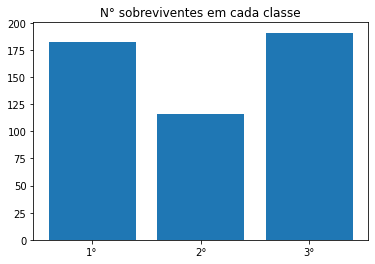

In [ ]:
S_classe = df_s[['Pclass',"Sex"]].groupby(by = "Pclass").count().rename(columns = {"Sex": "N_sobreviventes"})

plt.bar(['1°','2°','3°'],S_classe.N_sobreviventes)
plt.title("N° sobreviventes em cada classe")
plt.show()

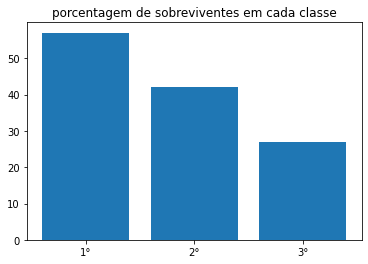

In [ ]:
total_classe = df3[['Pclass',"Sex"]].groupby(by = "Pclass").count().rename(columns = {"Sex": "N_sobreviventes"})
perct_s = 100*S_classe/total_classe
plt.bar(['1°','2°','3°'],perct_s.N_sobreviventes)
plt.title("porcentagem de sobreviventes em cada classe")
plt.show()

#### idade

In [ ]:
df3['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  , 22.5 ,
       18.5 , 67.  , 76.  , 26.5 , 60.5 , 11.5 ,  0.33,  0.17, 38.5 ])

#### Tentativa de relacionar idade com algo

PassengerId
Survived
Pclass


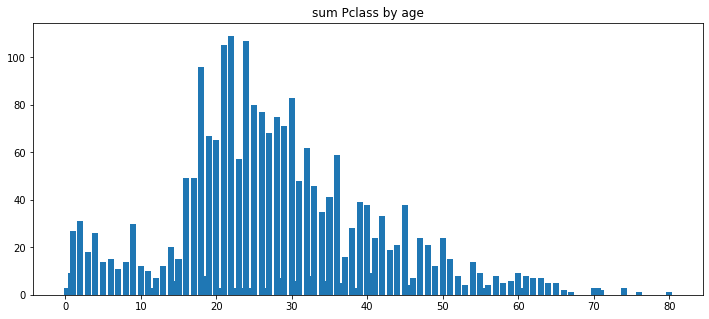

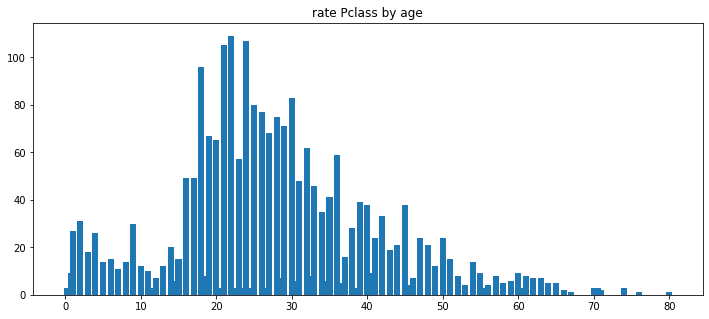



____________________________________________________________________________________________________

Sex


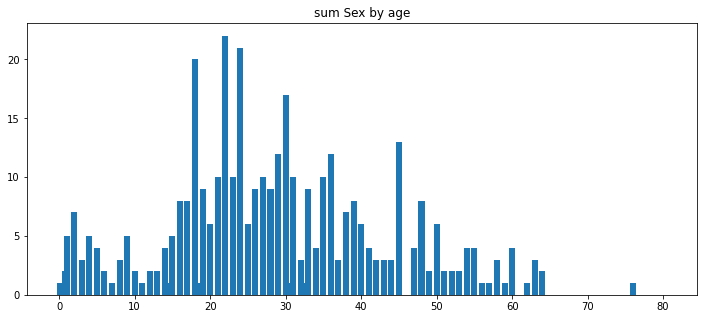

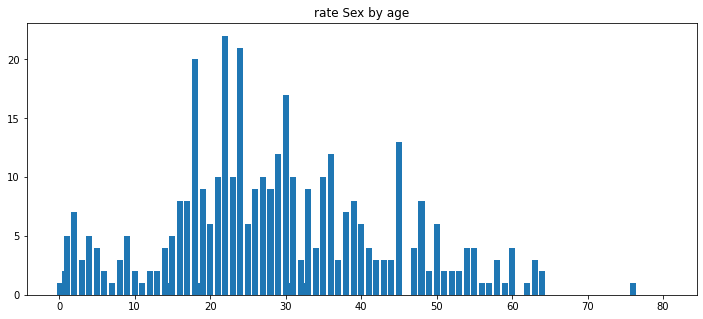



____________________________________________________________________________________________________

SibSp


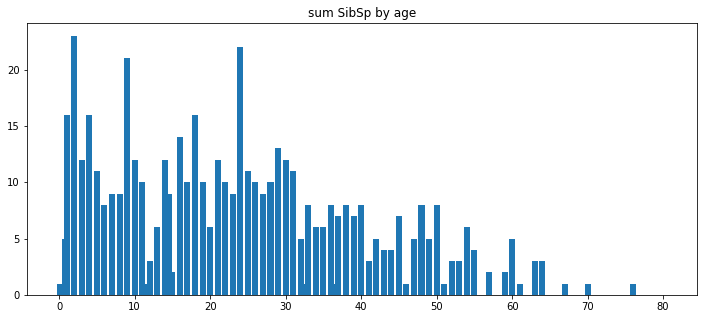

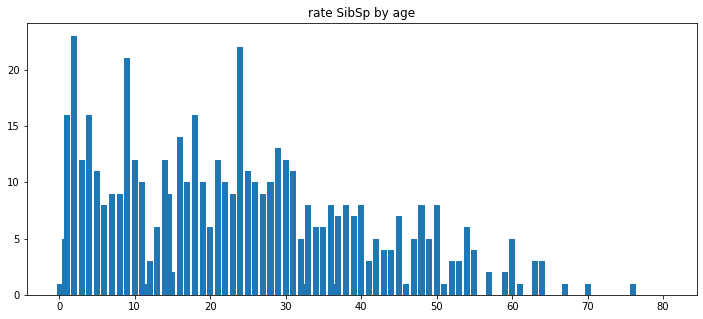



____________________________________________________________________________________________________

Parch


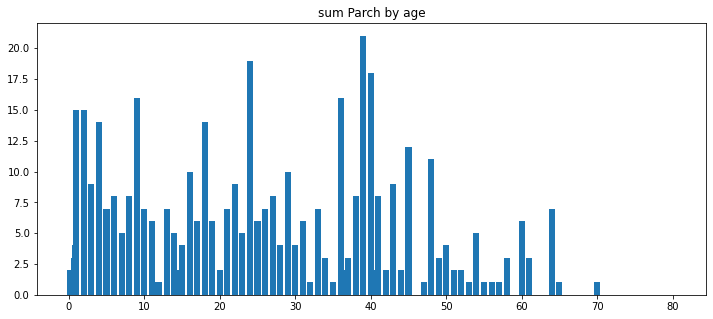

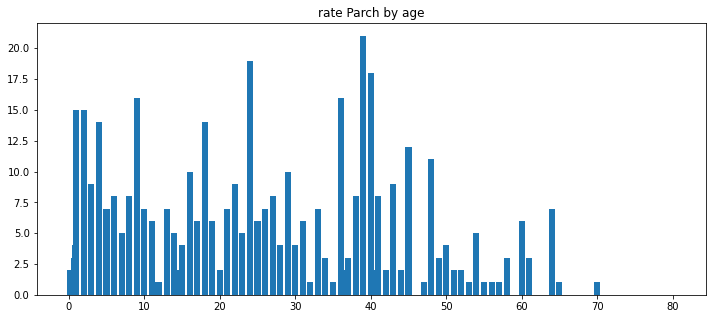



____________________________________________________________________________________________________

Ticket
Fare


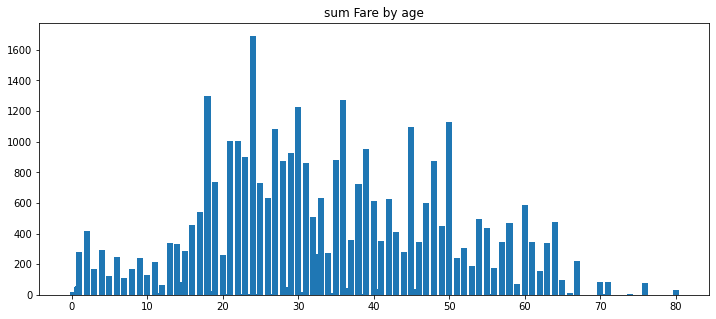

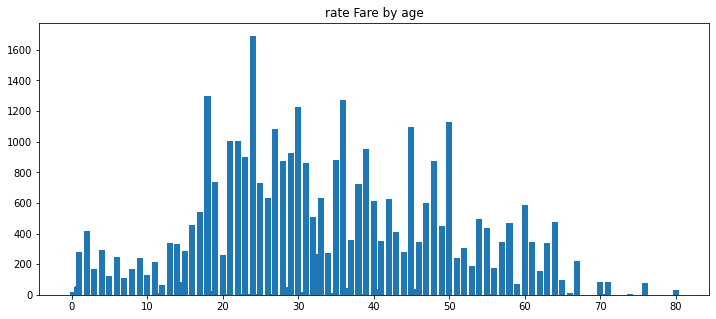



____________________________________________________________________________________________________

Cabin
Embarked


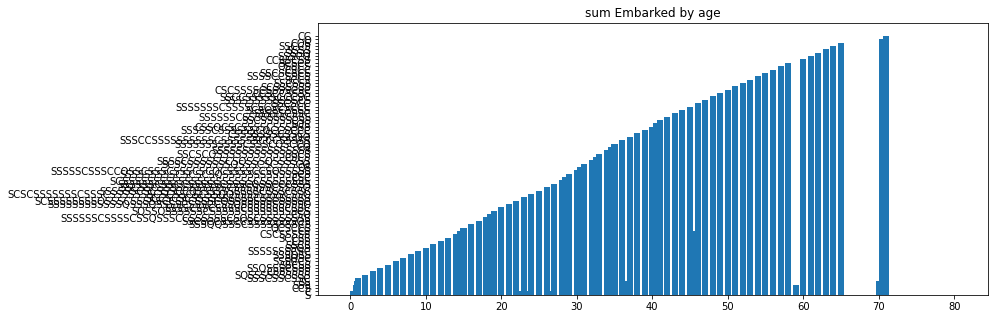




____________________________________________________________________________________________________

Pronome


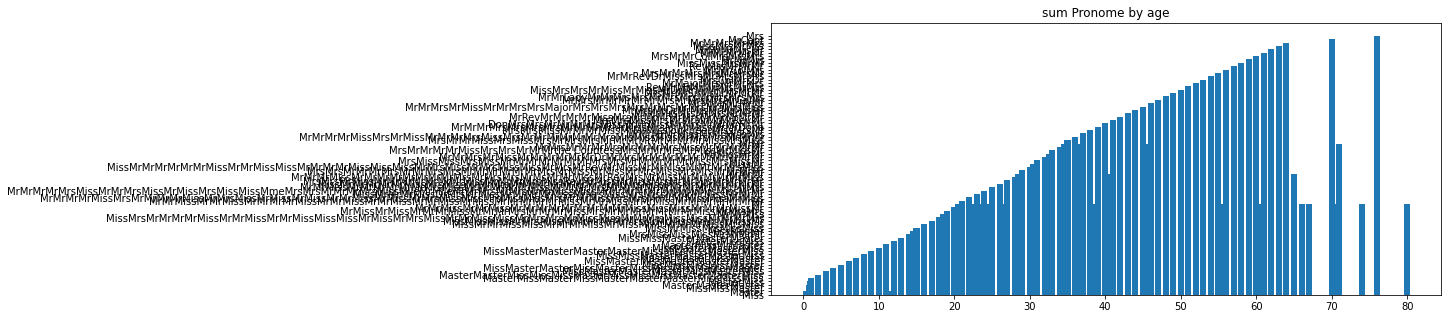




____________________________________________________________________________________________________

Pronome_index


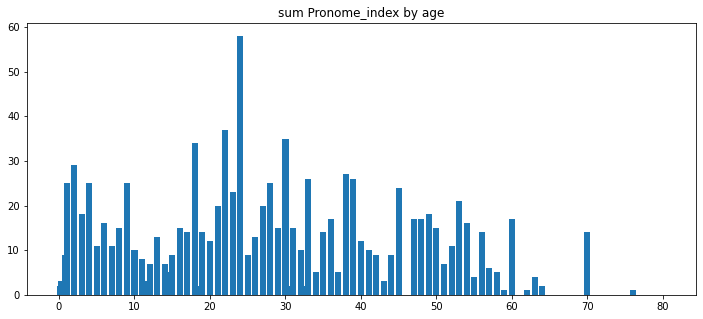

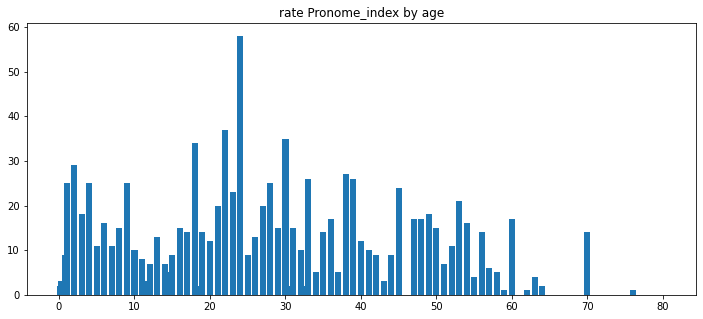



____________________________________________________________________________________________________



In [ ]:
lista_colunas = df3.columns.to_list()
lista_colunas.remove('Age')
for col in lista_colunas:
    print(col)
    if not ( col == 'Name' or col == 'Ticket' or col == 'Cabin' or col == 'PassengerId' or col =='Survived'): 
        grouped_sum = df3[['Age',col]].groupby(by = "Age").sum()
        plt.figure(figsize=(12,5))
        plt.bar(grouped_sum.index,grouped_sum[col])
        plt.title("sum "+  col +" by age")
        plt.show()
        print()
        
        grouped_count = df3[['Age',col]].groupby(by = "Age").count()
    
        if not (col == 'Embarked' or col == "Pronome") :
            grouped_rate = grouped_sum/grouped_count
            plt.figure(figsize=(12,5))
            plt.bar(grouped_count.index,grouped_sum[col])
            plt.title("rate "+  col +" by age")
            plt.show() 


        print("\n")
        print("_"*100+'\n')

#### SibSp

In [ ]:
df3['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [ ]:
idade = df3[df3['SibSp'] > 2].Age
print("media :  ",idade.mean())
print("desvio:  ",idade.std())
print("maximo:  ",idade.max())
print("N° NaN:  ",pd.isnull(idade).sum())
print("N° total:",len(idade))

print("N° |age > m+d: ", len(idade[idade > idade.mean()]))

media :   11.766666666666667
desvio:   9.686917137890859
maximo:   38.0
N° NaN:   12
N° total: 57
N° |age > m+d:  16


#### Parch

In [ ]:
pd.isnull(df3['Parch']).any()

False

In [ ]:
df3['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6, 9])

In [ ]:
idade = df3[df3['Parch'] == 9].Age
print("media :  ",idade.mean())
print("desvio:  ",idade.std())
print("maximo:  ",idade.max())
print("N° NaN:  ",pd.isnull(idade).sum())
print("N° total:",len(idade))

print("N° |age > m+d: ", len(idade[idade > idade.mean()]))

media :   nan
desvio:   nan
maximo:   nan
N° NaN:   2
N° total: 2
N° |age > m+d:  0


### Categorizando idade

In [ ]:
df3.loc[df3['Age'] < 18, 'Age'] = 1
df3.loc[(df3['Age'] >= 18) & (df3['Age'] < 36), 'Age'] = 2
df3.loc[(df3['Age'] >= 36) & (df3['Age'] < 55), 'Age'] = 3
df3.loc[(df3['Age'] >= 55, 'Age')] = 4

In [ ]:
df3['Age'] = df3['Age'].fillna(df3['Age'].mean())

#Para a tarifa
media_tarifa = df3['Fare'].mean()
df3['Fare'] = df3['Fare'].fillna(media_tarifa)
df3['Fare'].replace({0:media_tarifa}, inplace = True)

### Estatisticas de todas as colunas

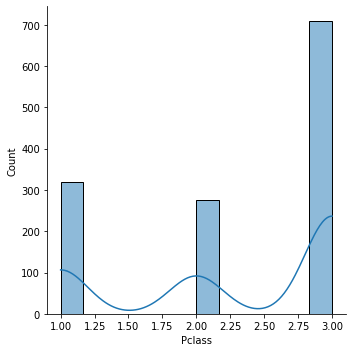

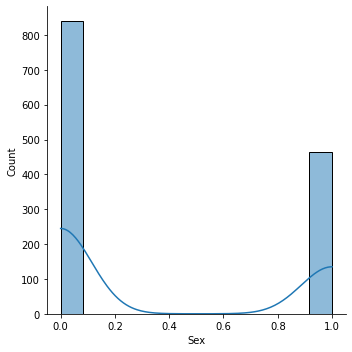

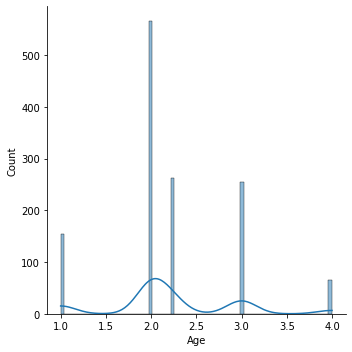

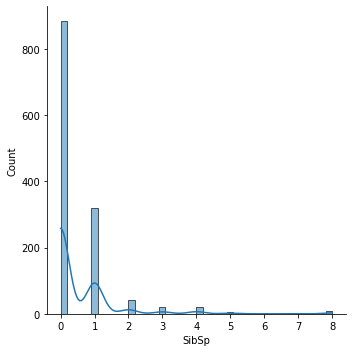

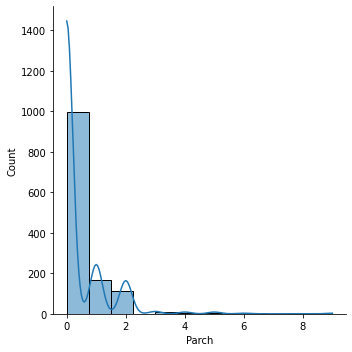

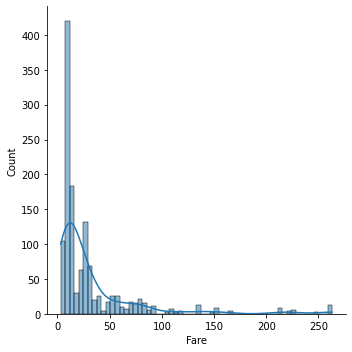

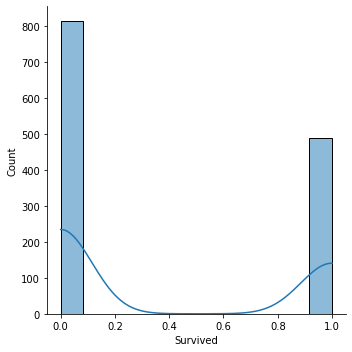

In [ ]:
display_estatisticas_colunas(df3,colunas_distribuicao)

### Treino

Acurácia =  0.8067484662576687 





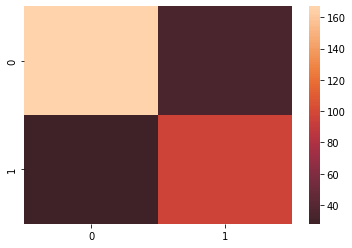

                   Predicted Not Survival  Predicted Survival
True Not Survival                     167                  35
True Survival                          28                  96
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       202
           1       0.73      0.77      0.75       124

    accuracy                           0.81       326
   macro avg       0.79      0.80      0.80       326
weighted avg       0.81      0.81      0.81       326



In [ ]:
df3 = df3 [['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived',"Pronome_index"]]
x = df3.drop(['Survived'], axis = 1)
y = df3['Survived'] 

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 28,)
tree = DecisionTreeClassifier(random_state = 28)
tree.fit(x_train, y_train)
getResults(x_test,y_test,tree)

# **Conclusão**

Ao decorrer do desenvolvimento deste projeto, foram realizados diversos experimentos com o objetivo de obter a melhor acurácia para a classificação da base de dados. E, a seguir, temos uma breve conclusão sobre os experimentos mais relevantes.

Durante o desenvolvimento do experimento 1, ao classificar utilizando a base, assim como foi nos dada, retirando apenas os atributos *name*, *ticket*, *cabin* e *embarked*, após a união, obtemos a acurácia de 79.41%. O que representou uma acurácia bastante satisfatória, dado o pré-processamento dos dados.

No experimento 2, ao classificar utilizando técnica para limpeza de dados vagos e preenchendo com a média os dados possiveis, obtemos a acurácia de 85.36%.

Por fim, ao realizar o experimento 3, ao classificar utilizando a correção dos valores do atributo *fare*, obtemos a acurácia de 80.67%.

Dessa forma, é possível perceber que para o método utilzado, árvore de devisão, o melhor resultado obtido foi visto no experimento 2, quando realizamos a limpeza dos dados vagos, que não trariam relevância para a classificação da base de dados.

